In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

In [115]:
data = pd.read_csv('assessment_da25.csv')
data.head(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [57]:
sample_size = data['Variant'].value_counts()

sample_size_A = variant_counts.get('A', 0)
sample_size_B = variant_counts.get('B', 0)

print("Sample Sizes per Variant:")
print("Variant A sample size:", sample_size_A)
print("Variant B sample size:", sample_size_B)

Sample Sizes per Variant:
Variant A sample size: 1000
Variant B sample size: 1000


In [119]:
conversions_df = data[data['GMV (in $)'] > 0]  
conversion_counts = conversions_df['Variant'].value_counts()

conversion_A = conversion_counts.get('A', 0)
conversion_B = conversion_counts.get('B', 0)

print("Conversions per Variant:")
print("Variant A conversions:", conversion_A)
print("Variant B conversions:", conversion_B)

Conversions per Variant:
Variant A conversions: 80
Variant B conversions: 97


In [98]:
conversion_rate_A_perc = "{:.2f}".format(conversion_A / sample_size_A * 100)
conversion_rate_B_perc = "{:.2f}".format(conversion_B / sample_size_B * 100)

print("Conversion Rate per Variant (%):")
print("Variant A conversions:", conversion_rate_A_perc, "%")
print("Variant B conversions:", conversion_rate_B_perc, "%")

Conversion Rate per Variant:
Variant A conversions: 8.00 %
Variant B conversions: 9.70 %


In [135]:
conversion_rate_A = conversion_A / sample_size_A
conversion_rate_B = conversion_B / sample_size_B

print("Conversion Rate per Variant:")
print("Variant A conversions:", conversion_rate_A)
print("Variant B conversions:", conversion_rate_B)

Conversion Rate per Variant:
Variant A conversions: 0.08
Variant B conversions: 0.097


In [165]:
conversion_rate_A_perc = float(conversion_rate_A_perc)
conversion_rate_B_perc = float(conversion_rate_B_perc)

sample_size_A = int(sample_size_A)
sample_size_B = int(sample_size_B)

std_dev_A = np.sqrt((conversion_rate_A * (1 - conversion_rate_A)) / sample_size_A)
std_dev_B = np.sqrt((conversion_rate_B * (1 - conversion_rate_B)) / sample_size_B)

print("Standard Deviation per Variant:")
print("Variant A conversions:{:.6f}".format(std_dev_A))
print("Variant B conversions:{:.6f}".format(std_dev_B))

Standard Deviation per Variant:
Variant A conversions:0.008579
Variant B conversions:0.009359


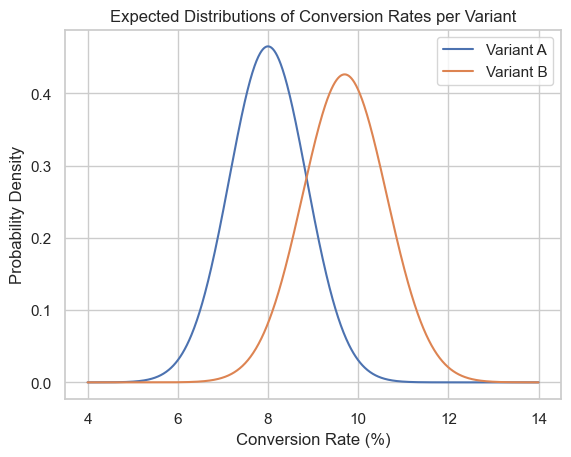

In [175]:
conversion_rate_range = np.linspace(4, 14, 1000)

pdf_A = norm.pdf(conversion_rate_range, conversion_rate_A_perc, std_dev_A*100)
pdf_B = norm.pdf(conversion_rate_range, conversion_rate_B_perc, std_dev_B*100)

plt.plot(conversion_rate_range, pdf_A, label='Variant A')
plt.plot(conversion_rate_range, pdf_B, label='Variant B')

plt.xlabel('Conversion Rate (%)')
plt.ylabel('Probability Density')
plt.title('Expected Distributions of Conversion Rates per Variant')
plt.legend()

plt.grid(True)
plt.show()

In [153]:
# Calculate Confidence Interval for A (95% = 1,96)

z_score_A = 1.96
margin_of_error_A = z_score_A * std_dev_A
print(margin_of_error_A)
lower_bound_A = conversion_rate_A - margin_of_error_A
upper_bound_A = conversion_rate_A + margin_of_error_A

print("Confidence Interval for A (95%):")
print("Confidence Intervall A lower bound:{:.6f}".format(lower_bound_A))
print("Confidence Intervall A upper bound:{:.6f}".format(upper_bound_A))

0.01681492670218934
Confidence Interval for A (95%):
Confidence Intervall A lower bound:0.063185
Confidence Intervall A upper bound:0.096815


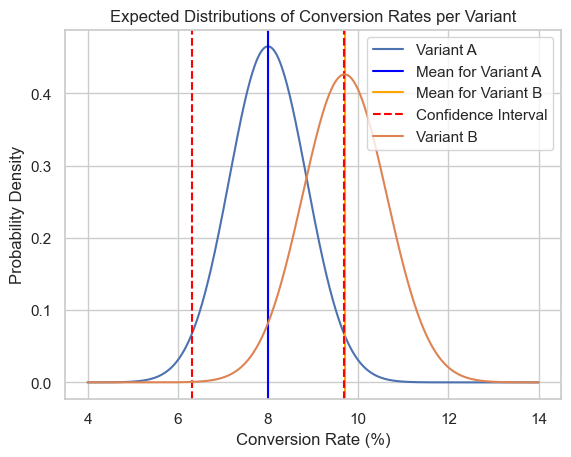

In [152]:
plt.plot(conversion_rate_range, pdf_A, label='Variant A')

plt.axvline(x=conversion_rate_A_perc, color='blue', linestyle='-', label='Mean for Variant A')
plt.axvline(x=conversion_rate_B_perc, color='orange', linestyle='-', label='Mean for Variant B')

plt.axvline(x=lower_bound_A* 100, color='red', linestyle='--', label='Confidence Interval')
plt.axvline(x=upper_bound_A * 100, color='red', linestyle='--')

plt.plot(conversion_rate_range, pdf_B, label='Variant B')

plt.xlabel('Conversion Rate (%)')
plt.ylabel('Probability Density')
plt.title('Expected Distributions of Conversion Rates per Variant')
plt.legend()

In [127]:

# Calculate pooled probability
conversion_total = conversion_A + conversion_B
sample_size_total = sample_size_A + sample_size_B
probability_pooled = conversion_total / sample_size_total

# Calculate standard error
standard_error = ((conversion_rate_A * (1 - conversion_rate_A)) / sample_size_A + (conversion_rate_B * (1 - conversion_rate_B)) / sample_size_B) ** 0.5

# Calculate z-score
z_score = (conversion_rate_B - conversion_rate_A) / standard_error

# Calculate two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Pooled Probability:{:.6f}".format(probability_pooled))
print("Standard Error:{:.6f}".format(standard_error))
print("z-score:{:.6f}".format(z_score))
print("p-value:{:.6f}".format(p_value))

Pooled Probability:0.088500
Standard Error:0.012696
z-score:1.338994
p-value:0.180573
